In [2]:
#Узнать статистику по количеству дней, когда пользователь не заходит на курс
#Сделать предположение о том уйдет ли он с курса или нет
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
events_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Pandas/StepikTask/event_data_train.csv')

In [5]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [ ]:
#timestamp unix time -количество секунд с момента Рождетсва Христова

In [41]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
#Перевод timestamp в нормальную дату
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [43]:
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [12]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [13]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [397]:
#Function that extracts year and month to create columns in dataframe

def extract_date(df, column):
    df[column+"_year"] = df[column].apply(lambda x: x.year)
    df[column+"_month"] = df[column].apply(lambda x: x.month)

In [398]:
extract_date(events_data, 'date')

In [399]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,year,month,month_count,date_year,date_month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015,6,NaN,2015,6
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015,6,1.0,2015,6
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015,6,2.0,2015,6
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015,6,3.0,2015,6
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015,6,NaN,2015,6


In [19]:
#Aggregating time series
#Представляем дату по месяцам
events_data.set_index('date', inplace = True)#seting date as the index
events_data.resample('M').mean() #monthly mean

,step_id,timestamp,user_id,date_year,date_month
date,,,,,
2015-06-30,32609.699043,1.435002e+09,13110.564509,2015.0,6.0
2015-07-31,33131.139669,1.436560e+09,13568.436441,2015.0,7.0
2015-08-31,32802.874457,1.439784e+09,15430.606182,2015.0,8.0
2015-09-30,32725.500753,1.442319e+09,15035.094857,2015.0,9.0
2015-10-31,32734.172844,1.445222e+09,14297.456279,2015.0,10.0
2015-11-30,32800.241970,1.447612e+09,14140.340982,2015.0,11.0
2015-12-31,32840.624546,1.450181e+09,13490.822805,2015.0,12.0
2016-01-31,32794.939404,1.453076e+09,13415.122528,2016.0,1.0
2016-02-29,32815.864116,1.455587e+09,13779.705069,2016.0,2.0


In [20]:
events_data.resample('D').mean() #dayly mean

,step_id,timestamp,user_id,date_year,date_month
date,,,,,
2015-06-15,32491.512362,1.434376e+09,13175.376178,2015.0,6.0
2015-06-16,32376.832118,1.434461e+09,13486.634083,2015.0,6.0
2015-06-17,32394.841592,1.434549e+09,13665.630599,2015.0,6.0
2015-06-18,32379.916976,1.434635e+09,13435.559038,2015.0,6.0
2015-06-19,32337.744634,1.434721e+09,13743.812209,2015.0,6.0
...,...,...,...,...,...
2018-05-15,36453.950511,1.526387e+09,12207.666667,2018.0,5.0
2018-05-16,36285.210424,1.526477e+09,12493.959800,2018.0,5.0
2018-05-17,36415.831007,1.526565e+09,11443.349701,2018.0,5.0


In [ ]:
#Filling in Missing data
#ffill - fills the data with the last known value
#bfill - fills the data with the next known value

In [24]:
events_data.index.unique()

DatetimeIndex(['2015-06-15 04:00:48', '2015-06-15 04:01:35',
               '2015-06-15 04:02:01', '2015-06-15 04:02:19',
               '2015-06-15 04:02:24', '2015-06-15 04:02:30',
               '2015-06-15 04:03:11', '2015-06-15 04:03:36',
               '2015-06-15 04:03:59', '2015-06-15 04:04:04',
               ...
               '2018-05-19 23:21:09', '2018-05-19 23:23:28',
               '2018-05-19 23:24:47', '2018-05-19 23:27:06',
               '2018-05-19 23:27:09', '2018-05-19 23:27:49',
               '2018-05-19 23:28:00', '2018-05-19 23:31:25',
               '2018-05-19 23:32:30', '2018-05-19 23:33:31'],
              dtype='datetime64[ns]', name='date', length=2196932, freq=None)

In [28]:
#events_data.resample("D").ffill().head(6)
#events_data.resample("D").bfill().head(6)

In [29]:
#Date Indexing
#With the DateTimeIndex we have the convenience of passing in just the year
#or the year and a month as tring to index

events_data['2018'].head()

,step_id,timestamp,action,user_id,date_year,date_month
date,,,,,,
2018-01-01 00:26:20,32950,1514766380,viewed,14683,2018,1
2018-01-01 00:29:38,33439,1514766578,viewed,17979,2018,1
2018-01-01 01:06:24,33983,1514768784,viewed,10269,2018,1
2018-01-01 01:55:05,32186,1514771705,viewed,18404,2018,1
2018-01-01 03:27:08,32815,1514777228,viewed,1912,2018,1


In [30]:
events_data['2018-05'].head()

,step_id,timestamp,action,user_id,date_year,date_month
date,,,,,,
2018-05-01 00:00:50,31988,1525132850,viewed,22510,2018,5
2018-05-01 00:02:22,32182,1525132942,viewed,22510,2018,5
2018-05-01 00:03:01,32196,1525132981,passed,25388,2018,5
2018-05-01 00:03:01,32196,1525132981,discovered,25388,2018,5
2018-05-01 00:03:01,32196,1525132981,viewed,25388,2018,5


In [33]:
#We can pass date ranges to index
events_data['2018-05-03':'2018-05-10'].head()

,step_id,timestamp,action,user_id,date_year,date_month
date,,,,,,
2018-05-03 00:27:15,31959,1525307235,viewed,7702,2018,5
2018-05-03 01:11:24,33985,1525309884,viewed,7702,2018,5
2018-05-03 01:49:50,32946,1525312190,viewed,15979,2018,5
2018-05-03 01:50:01,31981,1525312201,viewed,15979,2018,5
2018-05-03 02:05:00,31988,1525313100,viewed,15979,2018,5


In [34]:
events_data['2018-05-03':'2018-05-10'].tail()

,step_id,timestamp,action,user_id,date_year,date_month
date,,,,,,
2018-05-10 23:16:28,31960,1525994188,viewed,3288,2018,5
2018-05-10 23:18:12,32188,1525994292,passed,22720,2018,5
2018-05-10 23:18:12,32188,1525994292,viewed,22720,2018,5
2018-05-10 23:18:12,32188,1525994292,discovered,22720,2018,5
2018-05-10 23:29:44,33139,1525994984,viewed,7702,2018,5


In [7]:
events_data['day'] = events_data.date.dt.date

In [123]:
events_data

,step_id,timestamp,action,user_id,date,day,passed_count
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015,NaN
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015,NaN
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015,9.0
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015,87.0
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015,NaN
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018,NaN
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018,NaN
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018,NaN
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018,NaN


In [46]:
#Построим график активности студентов по датам
events_data.groupby('day') \
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [187]:
#Нарисуем
events_data.groupby('day') \
    .user_id.nunique().plot(figsize = (20,10))

KeyError: 'day'

In [52]:
#Второй способ увеличить размер графика
sns.set(rc = {'figure.figsize' : (9,6)})

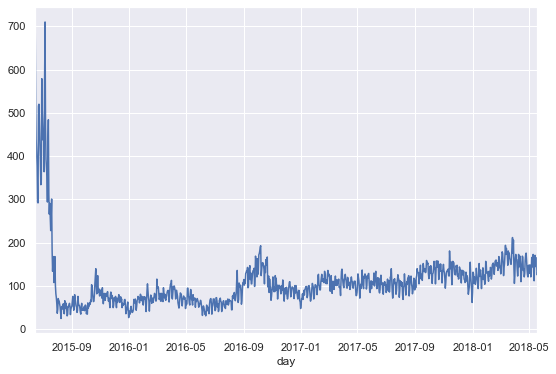

In [53]:
#Распределение пользователей по дням
events_data.groupby('day') \
    .user_id.nunique().plot()

In [54]:
#Распределение пользователей по количеству баллов, полученных за прохождение курса
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [55]:
#Неправильное решение
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id' : 'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


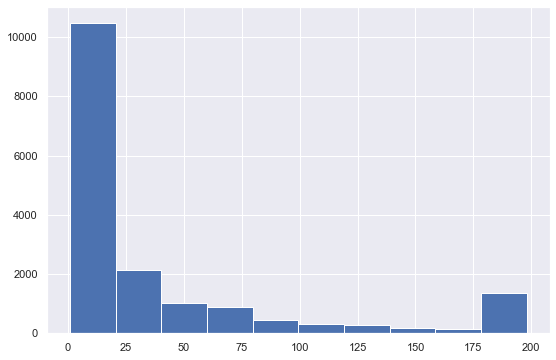

In [57]:
#Нарисуем
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id' : 'passed_steps'}).passed_steps.hist()

In [ ]:
#Ошибка данного метода заключается в том, что мы не учитываем пользователей,
#которые не прошли ни одного степа

In [ ]:
#Сделаем проверку кол-ва юзеров до группировки и после
#Если есть отличия, то это признак того, что мы ненароком откинули часть данных

In [58]:
events_data.user_id.nunique()

19234

In [61]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id' : 'passed_steps'}).user_id.count()

17262

In [62]:
#Как видим число значительно меньше, так как мы не приняли во внимание юзеров,
#не прошедших ни одного степа
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id' : 'passed_steps'}).passed_steps.min()
#Как видим минимальное кол-во степов = 1, должно быть 0

1

In [64]:
#Правильное решение c помощью pivot_table
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count',
                        fill_value = 0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [68]:
#Поднастроим индексы
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count',
                        fill_value = 0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


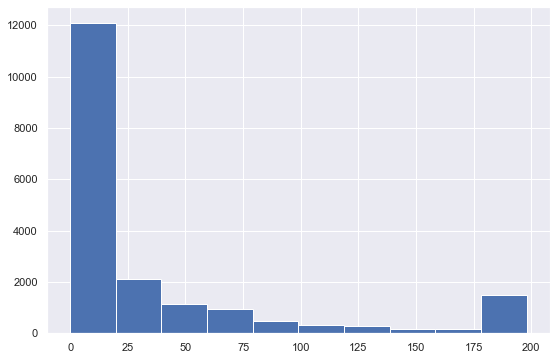

In [67]:
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count',
                        fill_value = 0).reset_index().discovered.hist()

In [70]:
submissions_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Pandas/StepikTask/submissions_data_train.csv')

In [73]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [77]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date

In [78]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [80]:
users_scores = submissions_data.pivot_table(index = 'user_id',
                                          columns = 'submission_status',
                                          values = 'step_id',
                                          aggfunc = 'count',
                                          fill_value = 0).reset_index()

In [81]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [85]:
#Задача - узнать какой из пользователей покинул курс, а какой остался
#Нужно посмотреть какие перерывы в днях наблюдаются у юзера во время прохождения курса

events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [86]:
#list - преобразует данные в лист
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [95]:
#Найдем разницу в днях
#np.diff - находит разницу между соседнимим элементами массива, сохраняя результат в массив
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list) \
            .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [91]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list) \
            .apply(np.diff).values

In [92]:
#Переведем массив массивов в одномерный массив
np.concatenate(gap_data, axis = 0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [93]:
#Переведем полученный результата в пандаскую серию и сохраним в переменную
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [100]:
#Получим разницу в днях
gap_data = gap_data / (24 * 60 * 60)

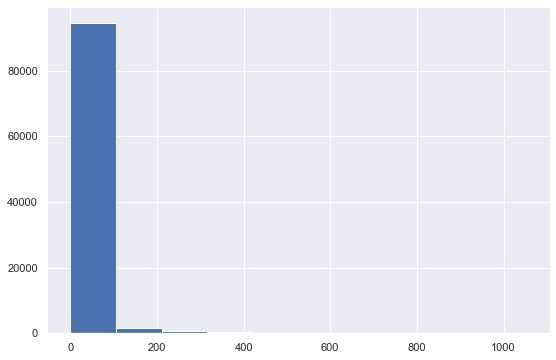

In [101]:
gap_data.hist()

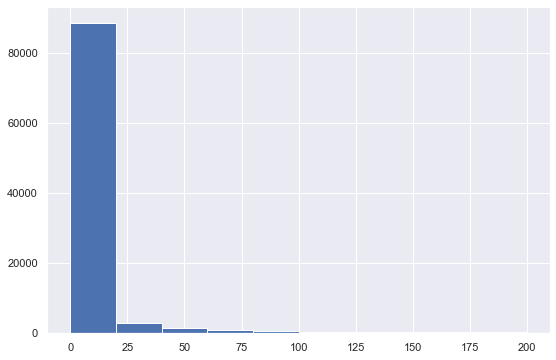

In [102]:
gap_data[gap_data<200].hist()

In [104]:
#95 процентов пользователей укладываются в перерыв от 0 до 60 дней
gap_data.quantile(0.95)

59.760440972222156

In [106]:
#90% пользоваетей укладываются в перерыв от 0 до 18 дней
gap_data.quantile(0.90)

18.325995370370403

In [114]:
#Вычислим id автора курса
events_data['passed_count'] = events_data.query('action == "passed"').groupby('user_id').aggregate({'step_id' : 'count'})

In [118]:
events_data.query('action == "passed"').groupby('user_id').aggregate({'step_id' : 'count'}).sort_values(['step_id'], ascending = False)

,step_id
user_id,
13365,198
25632,198
4546,198
21395,198
16489,198
...,...
18806,1
18802,1
18795,1


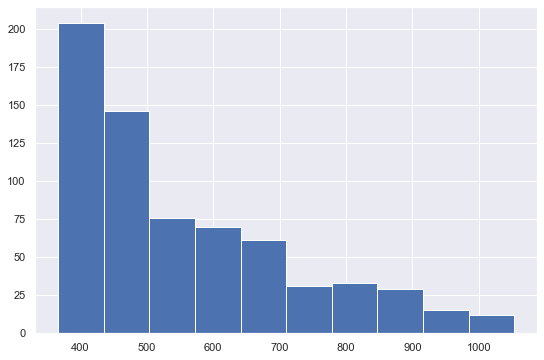

In [8]:
events_data['year'] = events_data.date.dt.year

In [131]:
events_data = events_data.drop(['passed_count'] , axis = 1)

In [132]:
events_data.group

,step_id,timestamp,action,user_id,date,day,year
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,2018
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,2018


In [147]:
submissions_data[submissions_data.submission_status=="correct"].groupby('user_id').aggregate({'submission_status':'count'}).sort_values(['submission_status'], ascending = False)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1


In [137]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [191]:
events_data.drop_duplicates(subset = ['step_id'])[events_data.action == 'passed'].groupby('user_id').aggregate({'step_id' : 'count'}).sort_values('step_id', ascending = False)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,step_id
user_id,
4762,11
1046,10
1078,4
20907,3
9244,2
11000,2
17632,2
24244,2
6711,1


In [223]:
events_data

,step_id,timestamp,action,user_id,date,day,year,month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015,6
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015,6
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015,6
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015,6
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015,6
...,...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,2018,5
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018,5
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018,5
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,2018,5


In [192]:
events_data.groupby('user_id').aggregate({'year' : 'count'}).sort_values('year', ascending = False).head()

,year
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905


In [198]:
temp = events_data.query('year == 2018')

In [409]:
events_data['month'] = events_data.date.dt.month

In [211]:
temp

,step_id,timestamp,action,user_id,date,day,year,month
2885575,32950,1514766380,viewed,14683,2018-01-01 00:26:20,2018-01-01,2018,1
2885576,33439,1514766578,viewed,17979,2018-01-01 00:29:38,2018-01-01,2018,1
2885577,33983,1514768784,viewed,10269,2018-01-01 01:06:24,2018-01-01,2018,1
2885578,32186,1514771705,viewed,18404,2018-01-01 01:55:05,2018-01-01,2018,1
2885579,32815,1514777228,viewed,1912,2018-01-01 03:27:08,2018-01-01,2018,1
...,...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,2018,5
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018,5
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018,5
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,2018,5


In [348]:
events_data.pivot_table(index="user_id", values="month", aggfunc=pd.Series.nunique).sort_values('month', ascending = False)

,month
user_id,
1078,12
6976,12
24745,12
22693,12
16939,12
...,...
10786,1
10787,1
10788,1


In [245]:
gap_user = events_data.query('user_id == 18025').drop_duplicates(subset = ['user_id', 'day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [246]:
gap_user = pd.Series(np.concatenate(gap_user, axis = 0))

In [251]:
gap_user = gap_user // (24 * 60 *60)

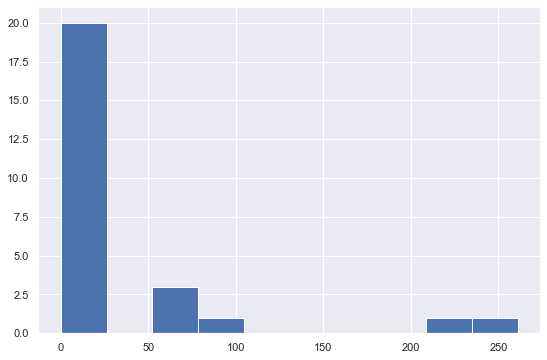

In [253]:
gap_user.hist()

In [365]:
temp = events_data.query('year == 2015')

In [366]:
a1 = temp.pivot_table(index="user_id", values="month", aggfunc=pd.Series.nunique).sort_values('month', ascending = False).reset_index()[:10]
a1

,user_id,month
0,18696,7
1,7780,7
2,20907,7
3,7596,7
4,15274,7
5,23342,7
6,14605,7
7,10672,7
8,1046,7
9,1078,7


In [326]:
a2 = temp.pivot_table(index="user_id", values="month", aggfunc=pd.Series.nunique).sort_values('month', ascending = False).reset_index()[:10]

In [427]:
a3 = temp.pivot_table(index="user_id", values="month", aggfunc=pd.Series.nunique).sort_values('month', ascending = False)[:10]

KeyError: 'month_year'

In [339]:
intersected_df = pd.merge(a1['user_id'], a2['user_id'], how='inner')
intersected_df

,user_id
0,1046


In [341]:
intersected_total = pd.merge(intersected_df, a3['user_id'], how = 'inner')
intersected_total

,user_id
0,1046


In [265]:
temp['month_count'] = events_data.pivot_table(index="user_id", values="month", aggfunc=pd.Series.nunique).sort_values('month', ascending = False)

In [430]:
###############################
###############################
#ВАЖНО
# 2Способа использовал для того чтобы найти автора курса
# 1. Искать в submissions_data по наибольшему количесту правильно решенных задач
# 2. Искать по количеству месяцев, когда юзер заходил за все 4года
# У автора будет наибольшее количество правильных решений и наибольшее количество месяцев за все 4 года

In [405]:
events_data.groupby('user_id').aggregate({'month' : 'nunique'}).sort_values('month', ascending = False)

,month
user_id,
1078,12
6976,12
24745,12
22693,12
16939,12
...,...
10786,1
10787,1
10788,1


In [417]:
events_data.groupby(['user_id', 'year'], as_index = False).aggregate({'month':'nunique'}).sort_values('month', ascending=False).query('year==2017')

,user_id,year,month
11322,13268,2017,12
1785,2054,2017,12
935,1046,2017,12
6023,6976,2017,11
506,594,2017,11
...,...,...,...
9063,10612,2017,1
9065,10615,2017,1
9084,10635,2017,1
9085,10636,2017,1


In [9]:
events_data['month_year'] = events_data.date.map(lambda x: x.strftime('%m-%Y'))

In [426]:
events_data

,step_id,timestamp,action,user_id,date,day,year,month,month_count,date_year,date_month,month_year
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015,6,NaN,2015,6,06-2015
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015,6,1.0,2015,6,06-2015
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015,6,2.0,2015,6,06-2015
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015,6,3.0,2015,6,06-2015
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015,6,NaN,2015,6,06-2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,2018,5,NaN,2018,5,05-2018
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018,5,NaN,2018,5,05-2018
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018,5,NaN,2018,5,05-2018
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,2018,5,NaN,2018,5,05-2018


In [428]:
events_data.pivot_table(index="user_id", values="month_year", aggfunc=pd.Series.nunique).sort_values('month_year', ascending = False)[:10]

,month_year
user_id,
1046,36
1078,28
21969,24
7596,21
24752,20
15274,20
8063,19
10262,19
4374,19


In [11]:
#Попалась рыбка!
events_data.groupby('user_id').aggregate({'month_year' : 'nunique'}).sort_values('month_year', ascending = False)[:1]

,month_year
user_id,
1046,36
